In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import curve_fit

In [11]:
system = 'Windows'

# folder_path = 'C:\\Users\AMO lab\Documents\Rydberg Data\\2023\\11\\22\\20ms'

if system == 'Mac':
    folder_path1 = '/Volumes/Users/AMO lab/Documents/Rydberg Data/2024/0116\\6'
else:
    folder_path1 = 'D:\\OneDrive - 南方科技大学\\各种书面文件（培养方案里的）\\master thesis\\figures\\dipole trap parameters\\dipole trap lifetime\\5'
    folder_path2 = 'D:\\OneDrive - 南方科技大学\\各种书面文件（培养方案里的）\\master thesis\\figures\\dipole trap parameters\\dipole trap lifetime\\5'

probe = plt.imread(folder_path1 + '\\' + 'probe.png').astype(np.float64)
bg = plt.imread(folder_path2 + '\\bg.png').astype(np.float64)
img = np.zeros((35, probe.shape[0],probe.shape[1]))
time = [10,20,40,60,80,100,150,200,300,400,600,800,1000]
# time = [10,20,40,60,80,100,150,200,250,300,400,500,600,700,800,900,1000]
print(len(time))
for i in range(0,len(time)):
    print(i)
    if system == 'Mac':
        img_temp = plt.imread(folder_path1+ '/' + i)
    else:
        img_temp = plt.imread(folder_path1+ '\\data_' + str(i) + '.png')
        img_temp = img_temp.astype(np.float64)
    img[i,:,:]=img_temp



13
0
1
2
3
4
5
6
7
8
9
10
11
12


Text(0.5, 1.0, 'Backgroud')

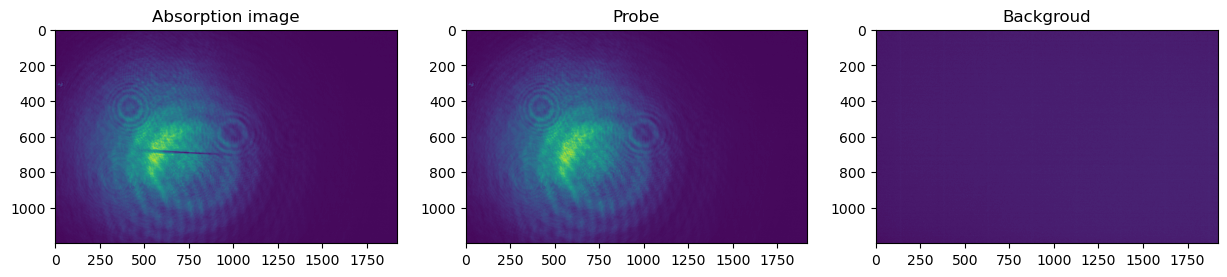

In [12]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.title('Absorption image')
plt.imshow(img[2,:,:])
plt.subplot(1,3,2)
plt.imshow(probe)
plt.title('Probe')
plt.subplot(1,3,3)
plt.imshow(bg)
plt.title('Backgroud')


([], [])

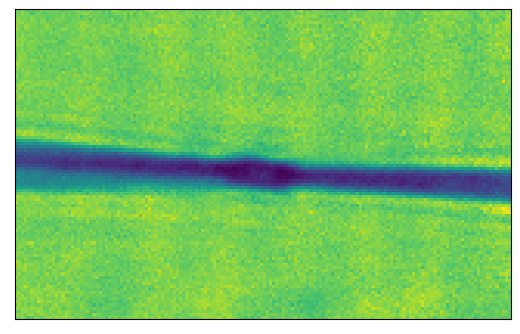

In [13]:
## crop to 400*400
# a = 490
# b = 890
# c = 570
# d = 970

a = 640
b = 740
c = 660
d = 820
img_crop = img[:,a:b,c:d]
probe_crop = probe[a:b,c:d]
bg_crop = bg[a:b,c:d]

plt.imshow((img_crop[3,:,:]-bg_crop)/(probe_crop-bg_crop))
# plt.colorbar()
plt.xticks([])
plt.yticks([])


In [14]:
(d-c)*5.86*1.5/4

351.6

(1200, 1920)
(35, 80, 4) (80, 4) (80, 4)


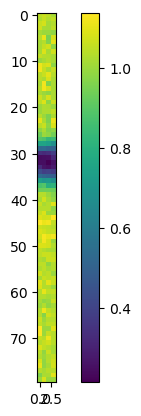

In [15]:
# Futher find the position

a2 = 20
b2 = 100
c2 = 72
d2 = 76

img_OD = img_crop[:,a2:b2,c2:d2]
probe_OD = probe_crop[a2:b2,c2:d2]
bg_OD = bg_crop[a2:b2,c2:d2]

print(bg.shape)
print(img_OD.shape,probe_OD.shape, bg_OD.shape)

plt.imshow((img_OD[10,:,:]-bg_OD)/(probe_OD-bg_OD))
plt.colorbar()

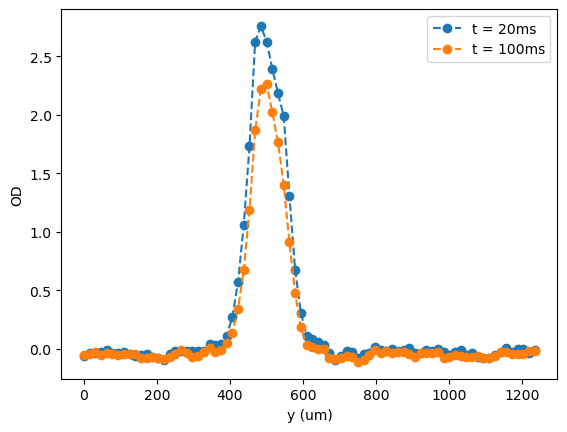

In [16]:
img_1D = img_OD.sum(axis = 2)
probe_1D = probe_OD.sum(axis = 1)
bg_1D = bg_OD.sum(axis = 1)
ab_1D = (img_1D - bg_1D) / (probe_1D - bg_1D)
x = np.arange(b2-a2) * 5.86 * 400/150
plt.plot(x,-np.log(ab_1D[2,:]),'o--', label = 't = 20ms')

plt.plot(x,-np.log(ab_1D[6,:]),'o--', label = 't = 100ms')
plt.xlabel('y (um)')
plt.ylabel('OD')
plt.legend()
# plt.plot((img_1D[2,:] - bg_1D) / (probe_1D - bg_1D))
# plt.plot((img_1D[10,:] - bg_1D) / (probe_1D - bg_1D))
# plt.plot((img_1D[15,:] - bg_1D) / (probe_1D - bg_1D))

In [17]:
def gaussian(x, amplitude, xo, sigma, bias = 0):
    xo = float(xo)
    g = amplitude * np.exp(-( (x - xo)**2 / (2* sigma**2) )) + bias
    return g
# rint(len(img_1D))

popt = np.zeros((len(time),4))
for i in range(len(time)):
    print(i)
    popt1, pcov1 = curve_fit(gaussian, x, -np.log(ab_1D[i,:]),p0=[1,500,100,0])
    popt[i,:] = popt1 #np.array(popt1)
print(popt.shape)

# plt.plot(time, -np.log(popt[:,3]+ popt[:,0]),'o--')


0
1
2
3
4
5
6
7
8
9
10
11
12
(13, 4)


[2.7447721  3.05430065 2.83811372 2.65492784 2.55537298 2.48362767
 2.34245301 2.0715306  1.87136534 1.66217038 1.44150926 1.24417822
 1.13441364]


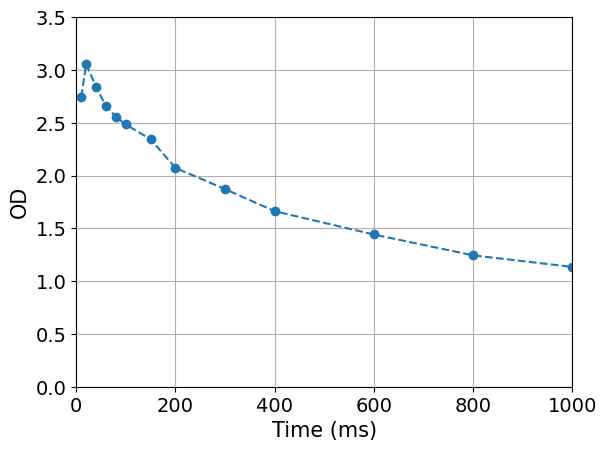

In [22]:
font = {'size':15,} # python用这个设置字体大小，后面用的时候就xlabel('',font)即可

plt.plot(time, popt[:,0],'o--')
# proplot.rc
print(popt[:,0])
plt.xlabel('Time (ms)',font)
plt.ylabel('OD',font)
plt.ylim([0,3.5])
plt.grid()
plt.xlim([0,1000])
plt.tick_params(labelsize = 14)
# plt.plot([-100,1000],np.ones(2)*popt[1,0]/np.exp(1),'--')
plt.savefig('dipole trap lifetime.png',dpi=300, bbox_inches='tight')
